In [2]:
import pandas as pd

df = pd.read_csv("mushrooms.csv")
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

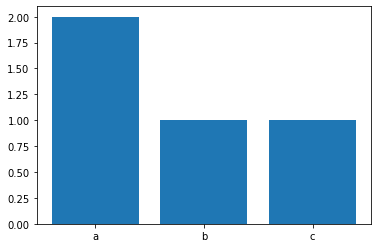

0    0
1    1
2    2
3    1
dtype: int64

In [49]:
from matplotlib import pyplot as plt

def turn_each_class_to_num(series : pd.Series):
    uniques = series.unique()
    series = series.apply(lambda x : list(uniques).index(x))
    plt.title(series.name)
    plt.bar(uniques, height = series.value_counts())
    plt.show()
#     print()
    return series

turn_each_class_to_num(pd.Series(["a", "b", "c", "b"]))

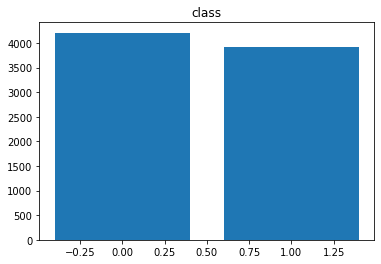

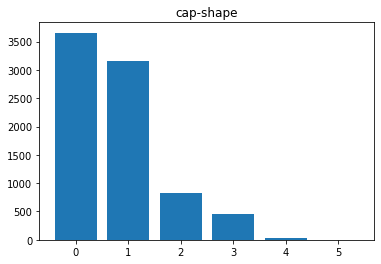

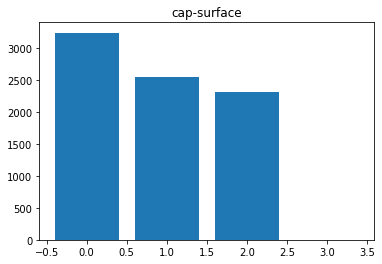

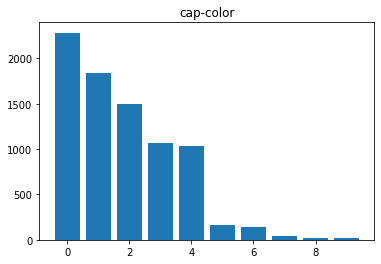

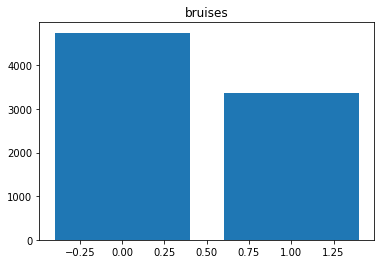

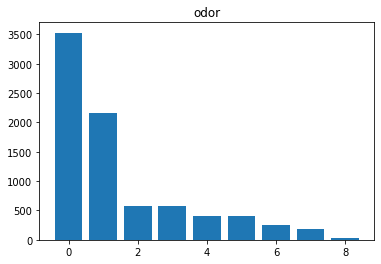

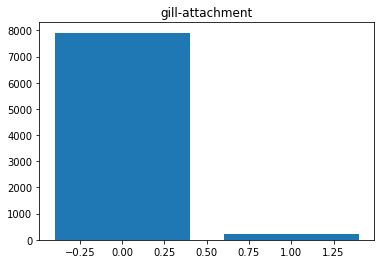

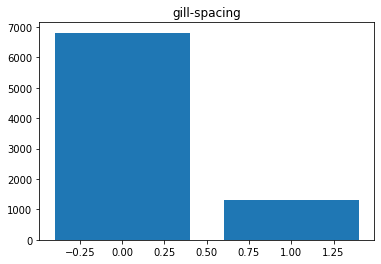

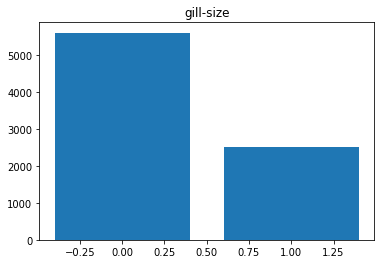

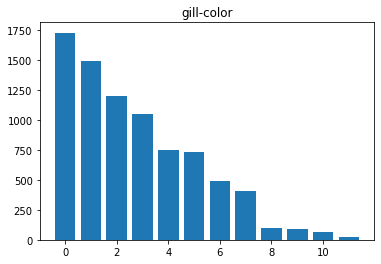

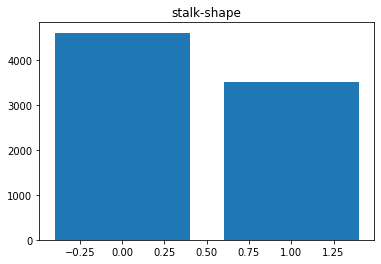

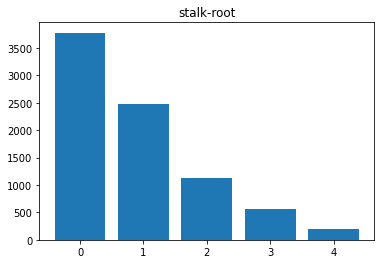

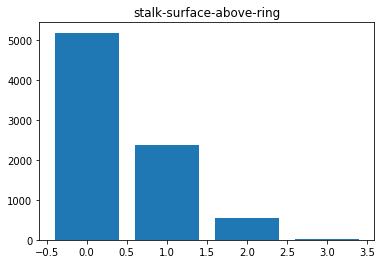

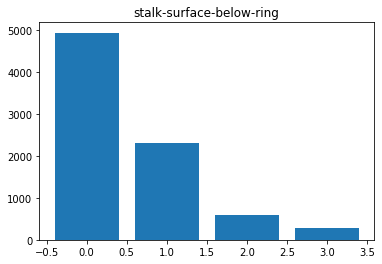

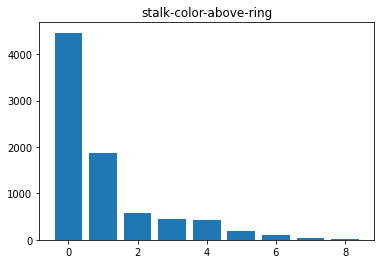

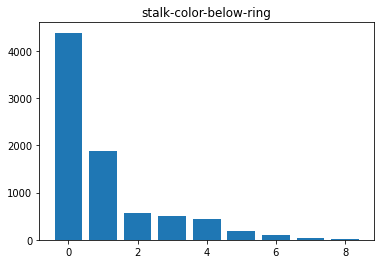

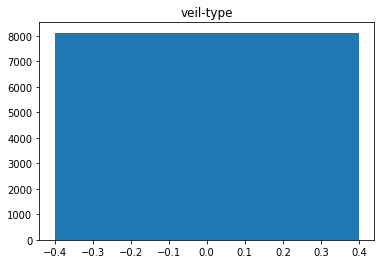

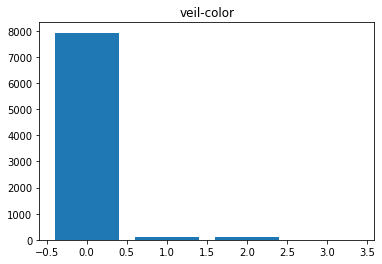

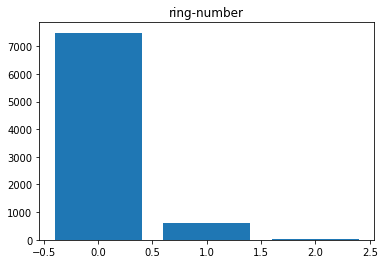

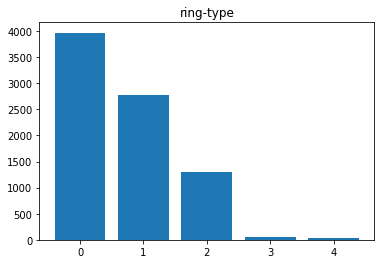

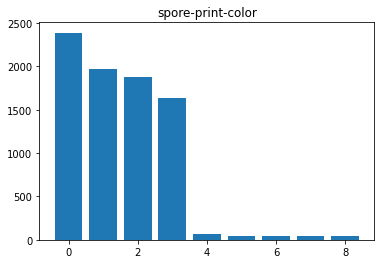

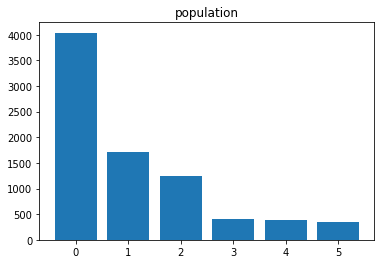

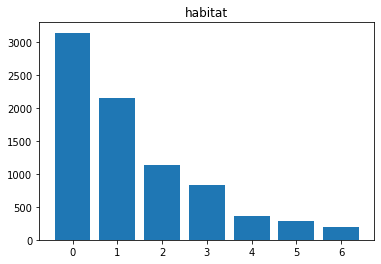

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      0          0            0          0        0     0                0   
1      1          0            0          1        0     1                0   
2      1          1            0          2        0     2                0   
3      0          0            1          2        0     0                0   
4      1          0            0          3        1     3                0   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          0           0  ...                         0   
1             0          1           0  ...                         0   
2             0          1           1  ...                         0   
3             0          0           1  ...                         0   
4             1          1           0  ...                         0   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

In [50]:
for col in df:
    df[col] = turn_each_class_to_num(df[col])
target = df["class"]
feature = df.drop(["class"], axis = 1)
print(df.head())

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=0)
nb = GaussianNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.9278096800656276


In [25]:
from sklearn.ensemble import RandomForestClassifier

rft = RandomForestClassifier(n_estimators = 1000, max_depth = 5, min_samples_split = 5)
y_pred = rft.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_pred, y_test))


0.9983593109105825


In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_split = 5, random_state = 20)
y_pred = dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9975389663658737


In [51]:
from sklearn.svm import SVC

svm = SVC(kernel = "sigmoid")
y_pred = svm.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7255947497949139


In [85]:
import seaborn as sns

class_corr = df.corr()["class"]
class_corr = abs(class_corr)
print(class_corr)
top10 = class_corr.nlargest(11)[1:].index
n_df = df[top10]


class                       1.000000
cap-shape                   0.112110
cap-surface                 0.169663
cap-color                   0.042028
bruises                     0.501530
odor                        0.582015
gill-attachment             0.129200
gill-spacing                0.348387
gill-size                   0.540024
gill-color                  0.412869
stalk-shape                 0.102019
stalk-root                  0.337542
stalk-surface-above-ring    0.552044
stalk-surface-below-ring    0.532452
stalk-color-above-ring      0.225294
stalk-color-below-ring      0.098476
veil-type                        NaN
veil-color                  0.120766
ring-number                 0.152261
ring-type                   0.556515
spore-print-color           0.560715
population                  0.155254
habitat                     0.191297
Name: class, dtype: float64


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(n_df, target, test_size=0.3, random_state=0)
nb = GaussianNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9265791632485644


In [86]:
from sklearn.svm import SVC

svm = SVC(kernel = "sigmoid")
y_pred = svm.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7990155865463495


In [87]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_split = 5, random_state = 20)
y_pred = dt.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9991796554552912


In [88]:
from sklearn.ensemble import RandomForestClassifier

rft = RandomForestClassifier(n_estimators = 1000, max_depth = 5, min_samples_split = 5)
y_pred = rft.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_pred, y_test))


0.9991796554552912


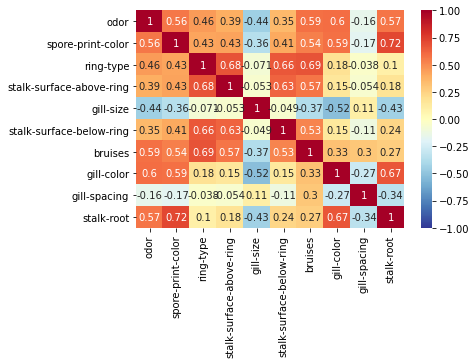

In [89]:
heatmap = sns.heatmap(n_df.corr(), cmap = plt.cm.RdYlBu_r, vmin = -1., vmax = 1., annot = True)
plt.show()